<b><big> GDP per capita (USD $)</big></b> 💵
<br>
<br>
<b>Data downloaded from:</b> https://data.worldbank.org/indicator/NY.GDP.PCAP.CD
<br>
<b>Data update by World Bank at</b> <u>30-06-2022</u>
<br>
<br>
Designed by <b>N</b>orth<b>B</b>rains <b>Analytics</b> 🧠
<br> 
Oskar Mierkiewicz & Sebastian Wozniczka

In [45]:
import pandas as pd 
import numpy as np

In [42]:
#step 1 - load data

df = pd.read_excel("data.xlsx")

In [67]:
#step 2 - order data

data = df.drop(columns = ["Indicator Name", "Indicator Code"]).round(decimals = 1) 
#round values in entire dataframe

data

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25496.8,26442.4,26895.1,28399.1,28453.7,29348.4,30253.7,31135.9,23384.3,NaN
1,Africa Eastern and Southern,AFE,162.7,162.6,172.3,199.8,180.2,199.5,211.1,213.6,...,1777.3,1748.9,1736.2,1556.3,1446.5,1629.4,1541.0,1511.3,1360.9,1557.7
2,Afghanistan,AFG,59.8,59.9,58.5,78.7,82.1,101.1,137.6,160.9,...,638.8,624.3,614.2,556.0,512.0,516.7,485.7,494.2,516.7,NaN
3,Africa Western and Central,AFW,107.9,113.1,118.8,123.4,131.9,138.5,144.3,128.6,...,1965.1,2157.5,2212.9,1894.3,1673.8,1613.5,1704.1,1777.9,1709.8,1774.9
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4978.4,5127.7,5094.1,3127.9,1728.0,2313.2,2524.9,2177.8,1631.4,2137.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3410.9,3704.8,3902.7,3520.8,3759.6,4009.4,4384.0,4416.1,4310.8,4986.6
262,"Yemen, Rep.",YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1446.5,1607.2,1674.0,1601.8,1152.7,964.3,758.1,750.6,631.7,690.8
263,South Africa,ZAF,511.6,526.5,546.3,589.2,632.7,674.2,714.6,775.3,...,8222.2,7467.1,6988.8,6259.8,5757.0,6690.9,7005.1,6624.8,5655.9,6994.2
264,Zambia,ZMB,232.2,220.0,212.6,213.9,242.4,303.3,343.4,360.2,...,1763.1,1878.3,1762.4,1338.3,1280.8,1535.2,1516.4,1305.0,985.1,1120.6


In [132]:
data.count() #show us how many rows in columns are valid (with no NaN values)

Country Name    266
Country Code    266
1960            133
1961            135
1962            137
               ... 
2017            257
2018            257
2019            255
2020            251
2021            229
Length: 64, dtype: int64

In [280]:
GDP = data.fillna(0) #changing NaN values for 0 - entire table

<b>Median Data</b>

In [303]:
MedianData = GDP.iloc[:, 2:] #skip columns with code and name of countries
MedianData = MedianData.median().round(decimals=1)
MDdf = pd.DataFrame(MedianData)
MDdf.reset_index(inplace=True) #convert index into dataframe's column
MDdf.columns = ['Year', 'GDP'] 
MDdf.dtypes #Year = object , GDP = float64
MDdf["Year"] = pd.to_numeric(MDdf["Year"]) #switch obejct type into int64 type
MDdf

,Year,GDP
0,1960,20.2
1,1961,41.3
2,1962,48.0
3,1963,47.7
4,1964,47.6
...,...,...
57,2017,6243.2
58,2018,6511.5
59,2019,6518.4
60,2020,5274.6


In [265]:
MedianMax = MDdf['GDP'].max()
IndexNumber = MDdf.index[MDdf['GDP'] == MDdf['GDP'].max()].tolist()
MedianMaxYear = MDdf['Year'].loc[54]

print("World max median is equal to:", MedianMax, "and it's from year:", MedianMaxYear)

World max median is equal to: 6604.4 and it's from year: 2014


In [282]:
MedianMin = MDdf['GDP'].min()
IndexNumber = MDdf.index[MDdf['GDP'] == MDdf['GDP'].min()].tolist()
MedianMinYear = MDdf['Year'].loc[0]

print("World min median is equal to:", MedianMin, "and it's from year:", MedianMinYear)

World min median is equal to: 20.2 and it's from year: 1960


In [309]:
from matplotlib import pyplot as plt 

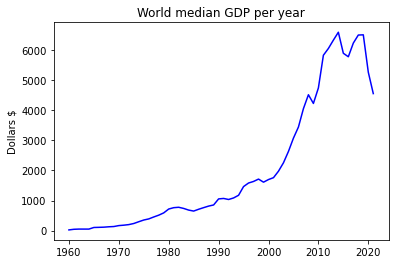

In [319]:
plt.plot(MDdf['Year'], MDdf['GDP'], color = 'blue', marker = '', linestyle = 'solid')
plt.title('World median GDP per year')
plt.ylabel('Dollars $')

plt.show()

<b>Mean Data</b>

In [270]:
MeanData = GDP.iloc[:, 2:] #skip columns with code and name of countries
MeanData = MeanData.mean().round(decimals=1)
MEdf = pd.DataFrame(MeanData)
MEdf.reset_index(inplace=True) #convert index into dataframe's column
MEdf.columns = ['Year', 'GDP'] 
MEdf.dtypes #Year = object , GDP = float64
MEdf["Year"] = pd.to_numeric(MEdf["Year"]) #switch obejct type into int64 type
MEdf

,Year,GDP
0,1960,238.6
1,1961,248.7
2,1962,264.7
3,1963,280.9
4,1964,304.7
...,...,...
57,2017,15822.2
58,2018,16746.7
59,2019,16512.3
60,2020,14307.3


In [275]:
MeanMax = MEdf['GDP'].max()
IndexNumber = MEdf.index[MEdf['GDP'] == MEdf['GDP'].max()].tolist()
MeanMaxYear = MEdf['Year'].loc[58]

print("World max mean is equal to:", MeanMax, "and it's from year:", MeanMaxYear)

World max mean is equal to: 16746.7 and it's from year: 2018


In [278]:
MeanMin = MEdf['GDP'].min()
IndexNumber = MEdf.index[MEdf['GDP'] == MEdf['GDP'].min()].tolist()
MeanMinYear = MEdf['Year'].loc[0]

print("World min mean is equal to:", MeanMin, "and it's from year:", MeanMinYear)

World min mean is equal to: 238.6 and it's from year: 1960


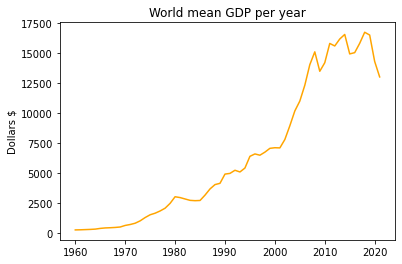

In [331]:
plt.plot(MEdf['Year'], MEdf['GDP'], color = 'orange', marker = '', linestyle = 'solid')
plt.title('World mean GDP per year')
plt.ylabel('Dollars $')

plt.show()

<b>Compering mean with median</b>

In [376]:
MMdf = pd.merge(MDdf, MEdf, how = 'left', on = ['Year']) #merged two tables MDdf and MEdf by the year 
MMdf.columns = ['Year', 'Median', 'Mean']
MMdf = MMdf.set_index('Year') #index will add into the chart automaticlly as x label
MMdf

,Median,Mean
Year,,
1960,20.2,238.6
1961,41.3,248.7
1962,48.0,264.7
1963,47.7,280.9
1964,47.6,304.7
...,...,...
2017,6243.2,15822.2
2018,6511.5,16746.7
2019,6518.4,16512.3


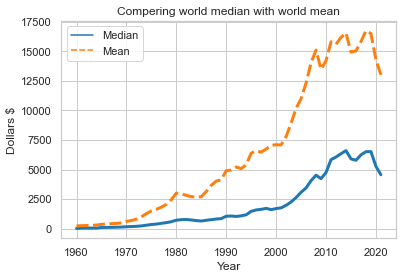

In [379]:
import seaborn as sns

sns.set_theme(style="whitegrid")

data = MMdf["Median"], MMdf["Mean"]

p = sns.lineplot(data=data, palette="tab10", linewidth=3)
p.set(ylabel = "Dollars $")
plt.title("Compering world median with world mean")
plt.show()